Elaboration from the example given in [Sebastian Raschka](http://sebastianraschka.com), 2015

https://github.com/rasbt/python-machine-learning-book

### Overview


- [Grouping objects by similarity using k-means](#Grouping-objects-by-similarity-using-k-means)
  - [Using the elbow method to find the optimal number of clusters](#Using-the-elbow-method-to-find-the-optimal-number-of-clusters)
  - [Quantifying the quality of clustering via silhouette plots](#Quantifying-the-quality-of-clustering-via-silhouette-plots)

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib inline

rnd_state = 42 # This variable will be used in all the procedure calls allowing a random_state parameter
               # in this way the running can be perfectly reproduced
               # just change this value for a different experiment

# Grouping objects by similarity using k-means
In this example we will use an _artificial_ data set

1. load the data file from `'ex1_4dim_data.csv'`
1. check the shape and produce a pairplot of the data  
1. observe the pairplots, decide which are the most interesting columns, to use in the plots of the clusters and comment your choice  
1. make a 2d plot of the two most promising columns  
1. Use the elbow method to find the optimal number of clusters: test `KMeans` with varying number of clusters, from 2 to 10
    1. fit the model with the data 
    1. get the inertia from the fitted model
    1. compute silhouette score  
1. Generate the best clustering
    1. Choose the optimal number of clusters looking at the plots, then 
    1. fit the model with the data using that number, 
    1. plot the clusters and 
    1. show the distortion
    1. plot the silhouette scores of the individual samples using the `plot_silhouette` function provided
1. For comparison, repeat 6 with two clusters

In [2]:
data_file = 'ex1_4dim_data.csv'
delimiter = ','
X = np.loadtxt(data_file, delimiter = delimiter)

In [3]:
X.shape

(1500, 4)

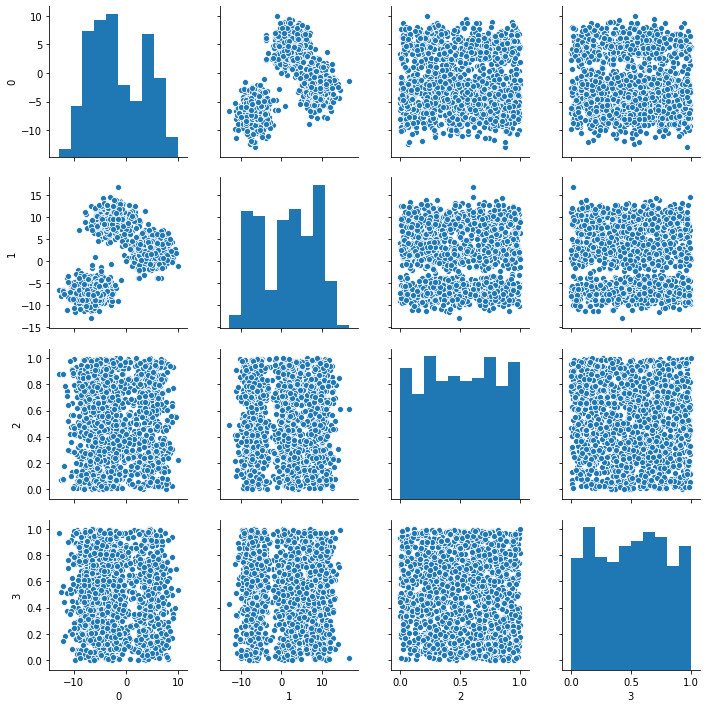

In [4]:
sns.pairplot(pd.DataFrame(X))

### 3. Observe the pairplots
In this simple example you can easily see from the pairplots that the two most interesting columns are `0` and `1`.

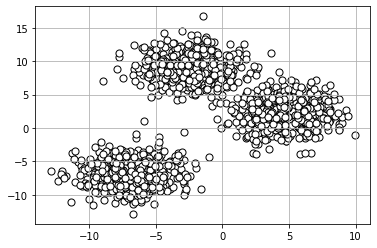

In [5]:
focus = [0,1] # storing here the interesting columns will make easier to try
              # with other columns
plt.scatter(X[:,focus[0]], X[:,focus[1]]
            , c='white'          # color filling the data markers
            , edgecolors='black' # edge color for data markers
            , marker='o'         # data marker shape, e.g. triangles (v<>^), square (s), star (*), ...
            , s=50)              # data marker size
plt.grid()  # plots a grid on the data
plt.show()

## 5. Using the elbow method to find the optimal number of clusters 
We will try __k_means__ with a number of clusters varying from 2 to 10

- prepare two emptys lists for inertia and silhouette scores
- For each value of the number of clusters:  
  - initialize an estimator for `KMeans` and `fit_predict`
  - we will store the distortion (from the fitted model) in the variable `distortions`
  - using the function `silhouette_score` from `sklearn.metrics` with arguments the data and the fitted labels, we will fill the variable `silhouette_scores`

Then we will plot the two lists in the y axis, with the range of k in the x axis.
The plot with two different scales in the `y` axis can be done according to the example shown in the notebook `two_scales.ipynb`.

In [6]:
k_range = range(2,11)

In [7]:
distortions = []
silhouette_scores = []
for i in k_range:
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=rnd_state)
    y_km = km.fit_predict(X)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X,y_km))

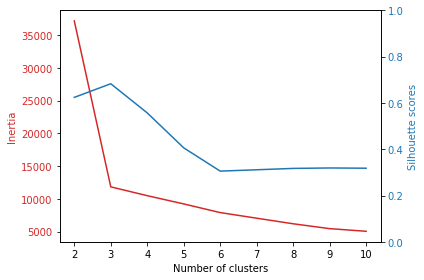

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### 6. Generate the best clustering

In [9]:
# 6.A to fill
distortions

[37148.68962897688,
 11831.845426637823,
 10488.078897856809,
 9228.848578052577,
 7907.833823860914,
 7052.007915617305,
 6200.623042513491,
 5459.565676550067,
 5056.14679103082]

In [10]:
silhouette_scores

[0.6240897802315681,
 0.6830901212186561,
 0.55699864047265,
 0.4059846086076612,
 0.30542228057843224,
 0.3112913997498135,
 0.31716446537272885,
 0.31905891689723936,
 0.31799618473446967]

In [11]:
chosen_k = k_range[np.argmax(silhouette_scores)]
chosen_k

3

In [12]:
km = KMeans(n_clusters=chosen_k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=rnd_state)
y_km = km.fit_predict(X)

In [13]:
km.cluster_centers_

array([[-6.89370123, -6.83658926,  0.52620605,  0.52371904],
       [ 4.75108211,  2.11850327,  0.4917521 ,  0.49502881],
       [-2.50474216,  9.09132188,  0.49394552,  0.48136246]])

In [14]:
from plot_clusters import plot_clusters

In [15]:
help(plot_clusters)

Help on function plot_clusters in module plot_clusters:

plot_clusters(X, y, dim, points, labels_prefix='cluster', points_name='centroids', colors=<matplotlib.colors.ListedColormap object at 0x113e00fd0>, points_color=(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0))
    Plot a two dimensional projection of an array of labelled points
    X:      numpy array with at least two columns
    y:      vector of labels, length as number of rows in X
    dim:    the two columns to project, inside range of X columns, e.g. (0,1)
    points: additional points to plot as 'stars'
    labels_prefix: prefix to the labels for the legend ['cluster']
    points_name:   legend name for the additional points ['centroids']
    colors: a color map
    points_color: the color for the points



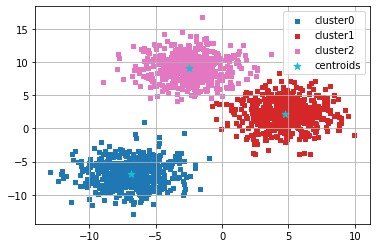

In [16]:
# 6.B to fill
plot_clusters(X,y_km,dim=(focus[0],focus[1]), points = km.cluster_centers_)

In [17]:
# 6.C to fill
print('Distortion: %.2f' % km.inertia_)

Distortion: 11831.85


### 6.D Quantifying the quality of clustering  via silhouette plots
The silhouette scores for the individual samples are computed with the function `silhouette_samples`

The function `plot_silhouette` produces a 'horizontal bar-plot', with one bar for each sample, where the length of the bar is proportional to the silhouette score of the sample. The bars are grouped for cluster and sorted for decreasing length. 

A vertical line represents the silhouette score, i.e. the average on all the samples,

In [18]:
# from plot_silhouette import plot_silhouette
from plot_silhouette2 import plot_silhouette

In [19]:
help(plot_silhouette)

Help on function plot_silhouette in module plot_silhouette2:

plot_silhouette(silhouette_vals, y, colors=<matplotlib.colors.ListedColormap object at 0x113e00fd0>, plot_noise=False)
    Plotting silhouette scores for the individual samples of a labelled data set.
    The scores will be grouped according to labels and sorted in descending order.
    The bars are proportional to the score and the color is determined by the label.
    
    silhouette_vals: the silhouette values of the samples
    y:               the labels of the samples
    plot_noise:      boolean, assumes the noise to be labeled with a negative integer



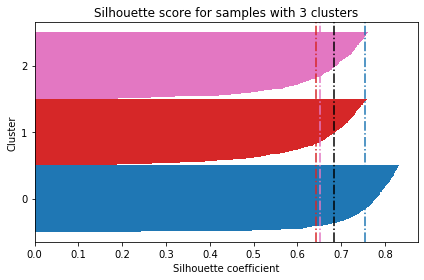

In [20]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] # it is the number of rows
# Compute the Silhouette Coefficient for each sample, with the euclidean metric
silhouette_score_samples = silhouette_samples(X, y_km, metric='euclidean')
plt.title('Silhouette score for samples with {} clusters'.format(chosen_k))
plot_silhouette(silhouette_score_samples, y_km)

### 7. Comparison to "bad" clustering:

In [21]:
chosen_k = 2

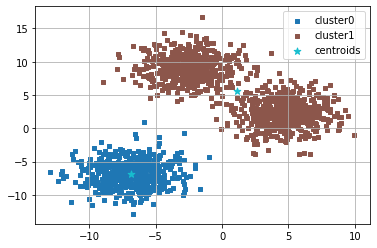

In [22]:
km = KMeans(n_clusters=chosen_k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=rnd_state)
y_km = km.fit_predict(X)
plot_clusters(X,y_km,dim=(focus[0],focus[1]), points = km.cluster_centers_)

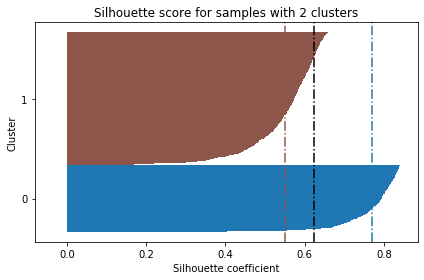

In [23]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] 
silhouette_score_samples = silhouette_samples(X, y_km, metric='euclidean') 
plt.title('Silhouette score for samples with {} clusters'.format(chosen_k))
plot_silhouette(silhouette_score_samples, y_km)